<a href="https://colab.research.google.com/github/pedsanches/C-digos_GA/blob/main/GA_Rastrigin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import matplotlib.cm as cm

# Avaliador de fitness


In [ ]:
def avaliador(indv=[]):
  #print(indv)
  soma = 0
  for i in range(2):
    soma += (indv[i] ** 2) - 10 * math.cos(2 * math.pi * indv[i])
  soma+=10*2
  if(numpy.size(indv)==3):
    indv[2] = soma
  else:
    indv.append(soma)
  return indv

# Gerador do individuo 

In [ ]:
def gera_indviduo():
  indv = [(random.random()-0.5)*10.24 , (random.random()-0.5)*10.24 ]
  return indv

#Torneio


In [ ]:
def torneio(pop=[]):
  indv1 =  pop[random.randint(0,t_pop-1)]
  indv2 =  pop[random.randint(0,t_pop-1)]
  if(indv1[2] >= indv2[2]):
    return indv2.copy()
  else:
    return indv1.copy()
  

# Crossover

In [ ]:
def crossover(indv1=[], indv2=[]):
  filho=[]
  filhos=[]
  #print("Pais")
  #print(indv1,indv2)
  if (random.random()<= taxa_cros):  
    filho.append(indv1[0])
    filho.append(indv2[1])
    filhos.append(filho)
    filho=[]

    filho.append(indv2[0])
    filho.append(indv1[1])
    filhos.append(filho)
    filho=[]

  else:
    filho.append(indv1[0])
    filho.append(indv1[1])
    filhos.append(filho)
    filho=[]

    filho.append(indv2[0])
    filho.append(indv2[1])
    filhos.append(filho)
    filho=[]
  
  #print("Filhos")
  #print(filhos)
  #print("\n")
  return filhos.copy()  

#Mutação

In [ ]:
def mutacao(indv, sigma):
  if(random.random()<= taxa_mut):
    aux=random.gauss(mu,sigma)
    if(aux>=5.12):
      aux-= aux-5.12
    if(aux<=-5.12):
      aux+= (aux+5.12)*-1
    #Mutando a primeira parte do cromossomo 
    indv[0] = indv[0] + aux

  if(random.random()<= taxa_mut):
    aux=random.gauss(mu,sigma)
    if(aux >=5.12):
      aux -= aux-5.12
    if(aux<=-5.12):
      aux += (aux+5.12)*-1
    #Mutando a primeira parte do cromossomo  
    indv[1] = indv[1] + aux

  return indv

#Sobrevivencia

In [ ]:
qntd_melhorpai = 10

def sobrevivencia_melhorpai(pop=[]):
  melhorpai=[]
  for j in range(qntd_melhorpai):
    melhorpai.append(pop[0].copy())
    for i in range(t_pop):
      if(melhorpai[j][2] >= pop[i][2] and pop[i][2] not in [x[2] for x in melhorpai.copy()]):    
        melhorpai[j]=pop[i].copy()
  return melhorpai.copy()

In [ ]:
taxa_sobrevivencia = 0.5

def sobrevivencia_taxa(pop=[],filhos=[]):
  for i in range(t_pop):
    pop.append(filhos[i].copy())
  
  pop.sort(key=lambda x: x[2])

  #print(pop)
  pop = pop[:len(pop)-t_pop]
  #print(pop,"\n")
  
  return pop.copy()

#Main

In [ ]:
from numpy.core.numeric import True_
import random
import numpy
import math

mu = 0.0
taxa_mut = 0.5
taxa_cros = 0.8
t_pop = 100
espaco = 5.12

def GA(val):
  grafico_melhorpai = []
  grafico_geracao1X = []
  grafico_geracao50X = []
  grafico_geracao100X = []
  grafico_geracao1Y = []
  grafico_geracao50Y = []
  grafico_geracao100Y = []
  grafico_media = []
  pop = []
  filhos = []
  filho_cros = []
  melhorpai = []
  melhorpai_geral = [100,100,100]
  geracao = 0
  sigma = 1
  for i in range(t_pop):
    pop.append(gera_indviduo())
  
  while(1>0):
    soma = 0
    geracao += 1
    filhos=[]
    sigma = sigma/(geracao/10)
    #print("%.5f" %sigma)

#AVALIANDO OS INDIVIDUOS DA POPULACAO
    for i in range(t_pop):
      pop[i] = (avaliador(pop[i].copy())).copy()
      soma += pop[i][2]
      if(melhorpai_geral[2] >= pop[i][2]):
         melhorpai_geral = pop[i].copy()
    grafico_media.append(soma/t_pop)
    #print(pop[0].copy())

#GUARDANDO AS GERACOES
    if(geracao == 1):
      for i in range(t_pop):
        grafico_geracao1X.append(pop[i][0])
        grafico_geracao1Y.append(pop[i][1])
    else: 
      if(geracao == 4):
        for i in range(t_pop):
          grafico_geracao50X.append(pop[i][0])
          grafico_geracao50Y.append(pop[i][1])
      else: 
        if(geracao == 8):
          for i in range(t_pop):
            grafico_geracao100X.append(pop[i][0])
            grafico_geracao100Y.append(pop[i][1])

#FAZENDO O CROSSOVER 
    for i in range(0,t_pop,2):
      filho_cros = (crossover(torneio(pop),torneio(pop))).copy()
      filhos.append(filho_cros[0])
      filhos.append(filho_cros[1])
    
#MUTANDO OS FILHOS
    for i in range(t_pop):
      filhos[i] = mutacao(filhos[i], sigma)

#DECIDINDO QUEM SOBREVIVERÁ
  #ESTRATEGIA MELHOR PAIS
    if(val == 1):
      melhorpai = sobrevivencia_melhorpai(pop.copy())
      pop = filhos.copy()
      for i in range(len(melhorpai)):  
        pop[random.randint(0,t_pop-1)] = melhorpai[i].copy()

  #ESTRATEGIA 50% MELHORES
    if(val == 2):
      for i in range(t_pop):
        filhos[i] = (avaliador(filhos[i].copy())).copy()
      pop = sobrevivencia_taxa(pop.copy(),filhos.copy())


    #print(f'{melhorpai_geral[0]:.7f}',f'{melhorpai_geral[1]:.7f}',f'{melhorpai_geral[2]:.7f}', "    Geracao:",geracao)
    #if(geracao==3):
      #break

    grafico_melhorpai.append(melhorpai_geral[2])
    #print(melhorpai_geral)
    #print("%.5f" % melhorpai_geral[2])
    #print(f'{melhorpai_geral[2]:.7f}')
    if(melhorpai_geral[2]<=0.0001 or geracao>=100):
      break

  #plt.plot(range(geracao), grafico_melhorpai, label="Melhor pai")
  #plt.plot(range(geracao), grafico_media, label="Média")
  #plt.title("Convergência em uma das execuções")
  #plt.xlabel('Geração')
  #plt.ylabel('Fitness')
  #plt.legend()
  #plt.figure(figsize=(10,6))

  #X = numpy.linspace(-5.12, 5.12, 100)     
  #Y = numpy.linspace(-5.12, 5.12, 100)     
  #X, Y = numpy.meshgrid(X, Y) 

  #Z = (X**2 - 10 * numpy.cos(2 * numpy.pi * X)) + \
  #(Y**2 - 10 * numpy.cos(2 * numpy.pi * Y)) + 20

  #fig, ax = plt.subplots()
  #CS = plt.contour(X, Y, Z, 8, cmap=cm.jet)
  #ax.clabel(CS, inline=True, fontsize=10)

  
  #plt.plot(grafico_geracao1X, grafico_geracao1Y,'ro')
  #plt.axis([-5.2, 5.2, -5.2, 5.2])
  #plt.show()

  #fig, ax = plt.subplots()
  #CS = plt.contour(X, Y, Z, 8, cmap=cm.jet)
  #ax.clabel(CS, inline=True, fontsize=10)
  #plt.plot(grafico_geracao50X, grafico_geracao50Y,'ro')
  #plt.axis([-5.2, 5.2, -5.2, 5.2])
  #plt.show()

  #fig, ax = plt.subplots()
  #CS = plt.contour(X, Y, Z, 8, cmap=cm.jet)
  #ax.clabel(CS, inline=True, fontsize=10)
  #plt.plot(grafico_geracao100X, grafico_geracao100Y,'ro')
  #plt.axis([-5.2, 5.2, -5.2, 5.2])
  #plt.show()
  
  #plt.legend()


  #print("%.6f" % melhorpai_geral[2])
  return melhorpai_geral[2]

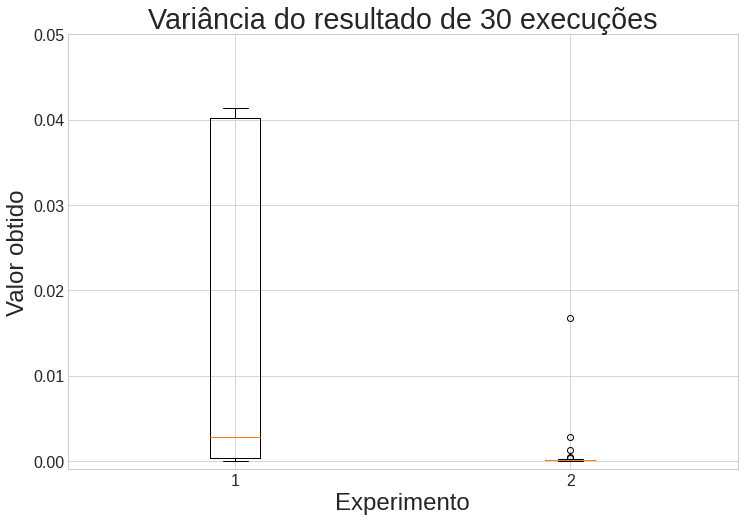

In [ ]:
from matplotlib import RcParams
soma = 0
vet1 = []
vet2 = []  
desviopadrao = 0
qntd_testes = 30

for i  in range(qntd_testes):
  vet1.append(GA(1))
  soma += vet1[i]
for i  in range(qntd_testes):
  vet2.append(GA(2))
  soma += vet2[i]


#print(vet1)


plt.figure(figsize=(12,8))
plt.boxplot([vet1,vet2])

plt.title("Variância do resultado de 30 execuções")
plt.xlabel('Experimento')
plt.ylabel('Valor obtido')
plt.ylim(-0.001,0.05)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
#print(plt.rcParams.keys())
#plt.xticks([1, 2], [maiores1[0], maiores2[0]])
plt.show()

for i  in range(qntd_testes):
  vet1[i] = vet1[i] - soma/qntd_testes
  desviopadrao += vet1[i] ** 2
  desviopadrao = desviopadrao/3
  desviopadrao = math.sqrt(desviopadrao)
  
#print("Média: ",soma/qntd_testes," Desvio Padrão: ",desviopadrao)  